In [1]:
import os
import torch
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import glob

from torch.utils.data import DataLoader, random_split
from torchvision import transforms

from dataset.LFWDataset import LFWDataset
from PIL import Image

In [2]:
root = os.path.join('.','data','lfw_crop_augmented_1')
transform = transforms.Compose([
    transforms.Resize((250, 250)),
    transforms.ToTensor(), 
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))]
)
dataset = LFWDataset(root, transform=transform)

In [30]:
paths = []
i=0
for picture in glob.glob(root+"/*"):    
    for a in glob.glob(picture+"/*"):
        paths.append(a)
        i+=1
        #print(a)
print(i)        
#print(paths)


13194


In [18]:
def load_and_transform_img(path):

    trfrm = transforms.Compose([transforms.Resize(224),  
                           transforms.ToTensor()]) 
                           #transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])])
    #prepare preprocess pipeline
    augmentation_1 = transforms.Compose([
        transforms.ToPILImage(),
        transforms.ColorJitter(brightness=0.8, contrast=0, saturation=0, hue=0),
        transforms.ToTensor()])   

    augmentation_2 = transforms.Compose([
        transforms.ToPILImage(),
        transforms.ColorJitter(brightness=0, contrast=0.8, saturation=0, hue=0),
        transforms.ToTensor()]) 
    
    augmentation_3 = transforms.Compose([
        transforms.ToPILImage(),
        transforms.ColorJitter(brightness=0, contrast=0, saturation=0.8, hue=0),
        transforms.ToTensor()]) 
    
    augmentation_4 = transforms.Compose([
        transforms.ToPILImage(),
        transforms.ColorJitter(brightness=0, contrast=0, saturation=0, hue=0.1),
        transforms.ToTensor()]) 
    
    augmentation_5 = transforms.Compose([
        transforms.ToPILImage(),
        transforms.RandomHorizontalFlip(p=1),
        transforms.ToTensor()])   

    augmentation_6 = transforms.Compose([
        transforms.ToPILImage(),
        transforms.RandomPerspective(distortion_scale=0.1, p=1),
        transforms.ToTensor()])  


    # read the image and transform it into tensor then normalize it with our trfrm function pipeline
    reg_img = trfrm(Image.open(path)).unsqueeze(0)

    reg_img_1 = reg_img
    # with newer torchvision version, one can also transform tensor batches (but cannot update torchvision)
    # Thus, I have to convert it to an PIL image first
    reg_img_2 = augmentation_1(reg_img.squeeze(0)).unsqueeze(0)
    reg_img_3 = augmentation_2(reg_img.squeeze(0)).unsqueeze(0)
    reg_img_4 = augmentation_3(reg_img.squeeze(0)).unsqueeze(0)
    reg_img_5 = augmentation_4(reg_img.squeeze(0)).unsqueeze(0)
    reg_img_6 = augmentation_5(reg_img.squeeze(0)).unsqueeze(0)
    reg_img_7 = augmentation_6(reg_img.squeeze(0)).unsqueeze(0)
   

    return reg_img_1, reg_img_2, reg_img_3, reg_img_4, reg_img_5, reg_img_6, reg_img_7

In [31]:
for folder in glob.glob(root+"/*"):
    number = 0
    for pics in glob.glob(folder+"/*"):
        reg_img_1, reg_img_2, reg_img_3, reg_img_4, reg_img_5, reg_img_6, reg_img_7 = load_and_transform_img(pics)
        
        number += 1
        split = folder.split("\\")
        name = split[-1]
        trans = transforms.ToPILImage()
        
        reg_img_1_pil = trans(reg_img_1.squeeze(0))
        reg_img_2_pil = trans(reg_img_2.squeeze(0))
        reg_img_3_pil = trans(reg_img_3.squeeze(0))
        reg_img_4_pil = trans(reg_img_4.squeeze(0))
        reg_img_5_pil = trans(reg_img_5.squeeze(0))
        reg_img_6_pil = trans(reg_img_6.squeeze(0))
        reg_img_7_pil = trans(reg_img_7.squeeze(0))
        
        reg_img_1_pil.save(folder + "\{name}_000{number}_augmented_1.jpg".format(name=name, number=number))
        reg_img_2_pil.save(folder + "\{name}_000{number}_augmented_2.jpg".format(name=name, number=number))
        reg_img_3_pil.save(folder + "\{name}_000{number}_augmented_3.jpg".format(name=name, number=number))
        reg_img_4_pil.save(folder + "\{name}_000{number}_augmented_4.jpg".format(name=name, number=number))
        reg_img_5_pil.save(folder + "\{name}_000{number}_augmented_5.jpg".format(name=name, number=number))
        reg_img_6_pil.save(folder + "\{name}_000{number}_augmented_6.jpg".format(name=name, number=number))
        reg_img_7_pil.save(folder + "\{name}_000{number}_augmented_7.jpg".format(name=name, number=number))

In [33]:
paths = []
i=0
goal = 13194 * 8
for picture in glob.glob(root+"/*"):    
    for a in glob.glob(picture+"/*"):
        paths.append(a)
        i+=1
        #print(a)
print(i)
print(goal)

105552
105552


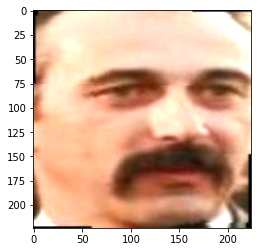

In [120]:
reg_img_1, reg_img_2, reg_img_3, reg_img_4, reg_img_5, reg_img_6, reg_img_7 = load_and_transform_img(".\data\lfw_crop\Aaron_Tippin\Aaron_Tippin_0001.jpg")

trans = transforms.ToPILImage()
#trans1 = transforms.ToTensor()
reg_img_2_pil = trans(reg_img_2.squeeze(0))
#plt.imshow(trans(reg_img_1.squeeze(0)))
#reg_img_1.squeeze(0).shape
#type(reg_img_1_1)
#dir(reg_img_1)
plt.imshow(reg_img_2_pil)
#reg_img_2_pil.save(".\data\lfw_crop_augmented\Aaron_Tippin\Aaron_Tippin_0001_augment1.jpg")

Text(0.5, 1.0, 'Random Perspective')

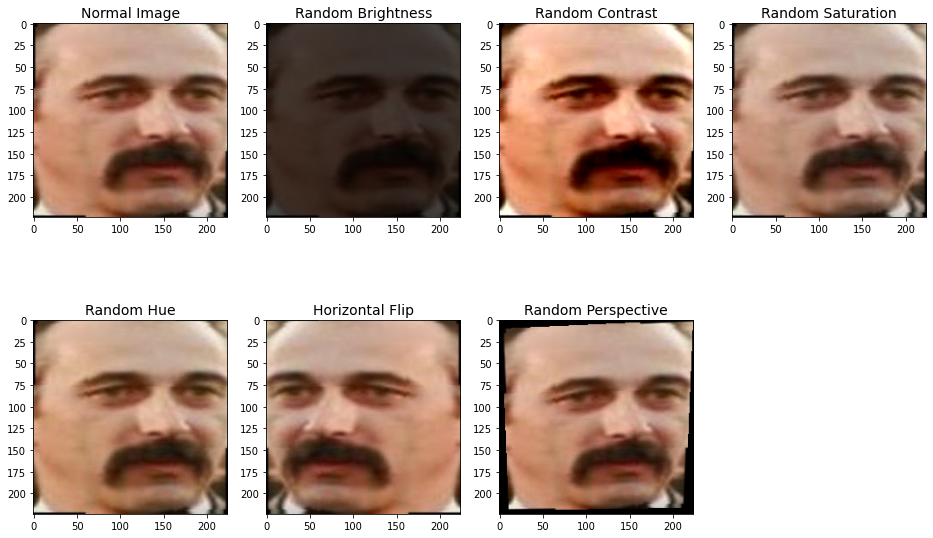

In [113]:
fig=plt.figure(figsize=(16, 10))

# Normal image
fig.add_subplot(2,4,1)
plt.imshow(reg_img_1[0].permute(1, 2, 0))
plt.title("Normal Image", {'fontsize': 14})

# Random Brightness (between 0.5 and 1.5)
fig.add_subplot(2,4,2)
plt.imshow(reg_img_2[0].permute(1, 2, 0))
plt.title("Random Brightness", {'fontsize': 14})

# Random Contrast (between 0.5 and 1.5)
fig.add_subplot(2,4,3)
plt.imshow(reg_img_3[0].permute(1, 2, 0))
plt.title("Random Contrast", {'fontsize': 14})

# Random Saturation (between 0.5 and 1.5) (Value of how dominant the color is, or how colorful the face looks)
fig.add_subplot(2,4,4)
plt.imshow(reg_img_4[0].permute(1, 2, 0))
plt.title("Random Saturation", {'fontsize': 14})

# Random Hue (between -0.3 and 0.3)
fig.add_subplot(2,4,5)
plt.imshow(reg_img_5[0].permute(1, 2, 0))
plt.title("Random Hue", {'fontsize': 14})

# Horizontal Flip
fig.add_subplot(2,4,6)
plt.imshow(reg_img_6[0].permute(1, 2, 0))
plt.title("Horizontal Flip", {'fontsize': 14})

# Random Perspective
fig.add_subplot(2,4,7)
plt.imshow(reg_img_7[0].permute(1, 2, 0))
plt.title("Random Perspective", {'fontsize': 14})